In [6]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikardi","key":"11fbc504f63357458d8babf59c3f481e"}'}

In [7]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission


kaggle.json


In [8]:
!kaggle competitions download -c cifar-10

  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 101MB/s]
 98% 597M/610M [00:06<00:00, 165MB/s]
100% 610M/610M [00:06<00:00, 97.5MB/s]
 85% 89.0M/105M [00:01<00:00, 38.6MB/s]
100% 105M/105M [00:01<00:00, 58.7MB/s] 
  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 185MB/s]


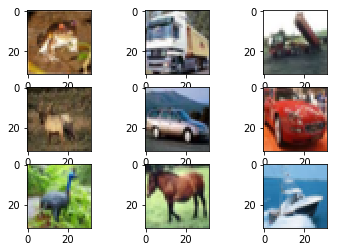

In [9]:

# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [0]:

# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
...
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
...
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
...
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
...
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816  

In [18]:
...
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 26s 524us/step - loss: 1.6899 - acc: 0.3890 - val_loss: 1.3605 - val_acc: 0.5104
Epoch 2/25
50000/50000 [==============================] - 19s 384us/step - loss: 1.3066 - acc: 0.5309 - val_loss: 1.1776 - val_acc: 0.5811
Epoch 3/25
50000/50000 [==============================] - 19s 383us/step - loss: 1.1283 - acc: 0.5984 - val_loss: 1.0557 - val_acc: 0.6246
Epoch 4/25
50000/50000 [==============================] - 19s 385us/step - loss: 1.0070 - acc: 0.6418 - val_loss: 1.0276 - val_acc: 0.6375
Epoch 5/25
50000/50000 [==============================] - 19s 382us/step - loss: 0.9064 - acc: 0.6769 - val_loss: 0.9749 - val_acc: 0.6541
Epoch 6/25
50000/50000 [==============================] - 19s 380us/step - loss: 0.8284 - acc: 0.7088 - val_loss: 0.9468 - val_acc: 0.6705
Epoch 7/25
50000/50000

In [19]:
...
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
...

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

Ellipsis

In [20]:
...
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 23s 457us/step - loss: 1.9213 - acc: 0.2910 - val_loss: 1.6333 - val_acc: 0.4221
Epoch 2/25
50000/50000 [==============================] - 22s 439us/step - loss: 1.4962 - acc: 0.4574 - val_loss: 1.4420 - val_acc: 0.4933
Epoch 3/25
50000/50000 [==============================] - 22s 443us/step - loss: 1.3237 - acc: 0.5204 - val_loss: 1.2309 - val_acc: 0.5679
Epoch 4/25
50000/50000 [==============================] - 22s 437us/step - loss: 1.1967 - acc: 0.5686 - val_loss: 1.1988 - val_acc: 0.5692
Epoch 5/25
50000/50000 [==============================] - 22s 438us/step - loss: 1.0981 - acc: 0.6094 - val_loss: 1.0400 - val_acc: 0.6353
Epoch 6/25
50000/50000 [==============================] - 22s 445us/step - loss: 1.0053 - acc: 0.6430 - val_loss: 0.9414 - val_acc: 0.6680
Epoch 7/25
50000/50000 [==============================] - 22s 442us/step - loss: 0.9292 - acc: 0.6722 - val_loss: 0.